# <font color=#693000><center>Chocolate issue</center></font>

### <font color=#693000>introduction</font>

You were hired by a smaller company that produces and sells its own sweet products. They want to add a chocolate bars to their portfolio, but do not have any insight into this particular field. So they got the best dataset they could find and wants you to extract as much useful information as you could. The company takes pride in their quality, the reviews and satisfaction of their customers are more important than their actual sales, they claim that quality precedes the success !

### <font color=#693000>task</font>

You were given a database. Company plans to start with production of 3 different flavoured chocolates, but has no idea about the market. As stated above, company is looking into creating best flavoured chocolates that would customers love. 
* Derive your suggestions for best 3 flavors from the dataset provided 
* Define why they are the best choices
* As this is a new field for company, provide 1 - 3 clear plots and commentary, that could help them understand the market they are going to conquer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = ".jupyter\\datasets\\model_situations\\"
df = pd.read_csv(path + "chocolates.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2223
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2224 non-null   int64  
 1   company                           2224 non-null   object 
 2   company_location                  2224 non-null   object 
 3   review_date                       2224 non-null   int64  
 4   country_of_bean_origin            2224 non-null   object 
 5   specific_bean_origin_or_bar_name  2224 non-null   object 
 6   cocoa_percent                     2224 non-null   float64
 7   rating                            2224 non-null   float64
 8   counts_of_ingredients             2224 non-null   int64  
 9   beans                             2224 non-null   object 
 10  cocoa_butter                      2224 non-null   object 
 11  vanilla                           2224 non-null   object 
 12  lecith

In [3]:
df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [4]:
df.describe()

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,693.959768,3.582151,5.278253,0.434329,0.929875
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2490.000000,2020.000000,100.000000,4.000000,6.000000


In [5]:
df["rating"].value_counts()

3.50    489
3.00    471
3.25    394
2.75    304
3.75    265
2.50    149
4.00    101
2.00     29
2.25     14
1.50      5
2.60      1
1.00      1
1.75      1
Name: rating, dtype: int64

Ok, our main target will be rating. Cocoa percent might be important feature. Generally we could say that chocolates with higher cocoa % will be more costly to produce as well as more ingredients. As we are looking more into quality, we dont have to depend on it too much, but still lets consider it if we would need to break a line somewhere. I would consider some plots if they can tell us something useful

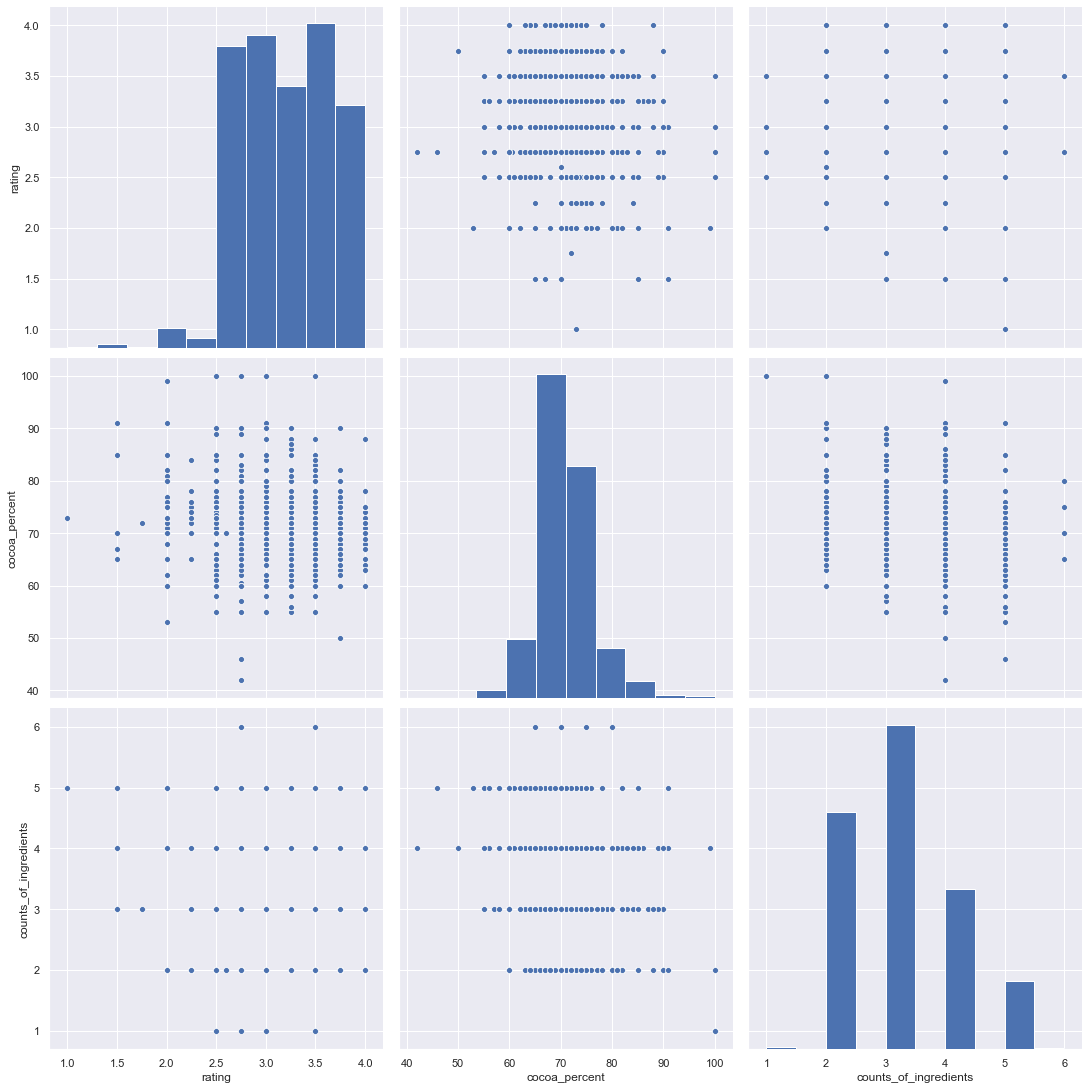

In [6]:
sns.set(rc={"figure.figsize":(14,8)})
sns.pairplot(data=df, vars=["rating","cocoa_percent", "counts_of_ingredients"], height=5)

Text(0.5, 1.0, 'Ratings of chocolates based on cocoa %, divided if there is cocoa butter')

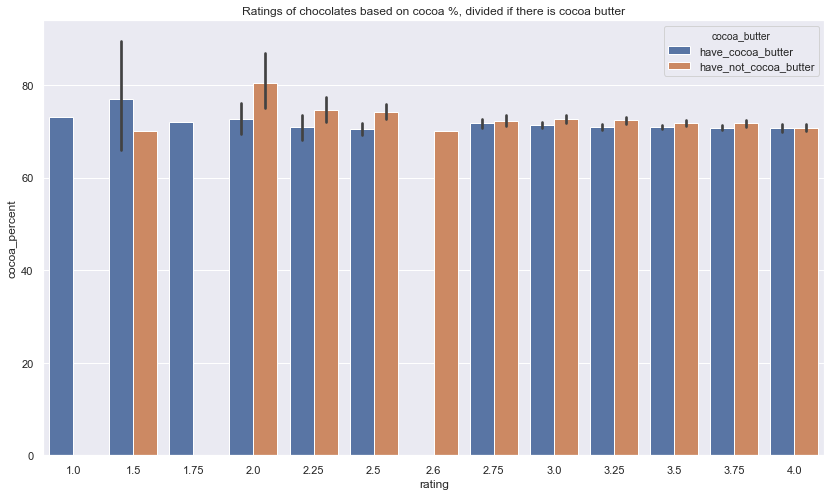

In [7]:
sns.barplot(data=df, x="rating", y="cocoa_percent", hue="cocoa_butter")
plt.title("Ratings of chocolates based on cocoa %, divided if there is cocoa butter")

In [8]:
# lets look how many tastes is there and their number
df["first_taste"].value_counts()

creamy                  160
sandy                   128
intense                  81
nutty                    76
fatty                    74
                       ... 
baked bread               1
burnt up front            1
burnt black licorice      1
pungent off flavor        1
ham                       1
Name: first_taste, Length: 456, dtype: int64

In [9]:
# there are too many specific tastes, lets take top 20 and inspect them
tastes_df = df.groupby(["first_taste"]).agg({
    "rating":"mean",
    "ref":"count"
    }).apply(lambda x: x.sort_values(ascending=False))

In [10]:
# now lets sort them by rating
tastes_df.sort_values(["rating"], ascending=False).head(20)

,rating,ref
distinct lemon,4.000,1
ligt color,4.000,1
simple red berry,4.000,1
smoth,4.000,1
cocoa and coconut,4.000,1
cinamon and nutmeg,4.000,1
chocolate covered banana,4.000,1
cardamon,4.000,1
well defined,4.000,1
pronounced berry,4.000,1


ok, there is too much noise from 1 ref chocolates, lets delete those with ref counts less than 5

In [11]:
tastes_df = tastes_df[tastes_df["ref"]>4]
tastes_df.sort_values(["rating"], ascending=False).head(20)

,rating,ref
delicate,3.714286,7
balanced,3.678571,7
dark berry,3.656250,8
cherry,3.607143,7
simple,3.600000,5
caramel,3.562500,8
complex,3.538462,26
orange,3.535714,7
tart,3.516667,15
rich cocoa,3.500000,23


I would like some middle ground here, nothing too mainstream but nothing with 1 reference. From this I am interested in these flavors:
* delicate - I will consider 7 ref enough given the highest rating from this set
* complex - is high in rating with enough references - but need to be looked into further, this is too vague
* cherry / dak berry - are kinda close together, this might suggest an favorite way of flavor here
* rich cocoa - again, enought rating and ref, also has nice ring to it, I think 1 flavor in this way might be nice

In [12]:
# now lets look into the complex chocolate a little deeper
complex_choc = df[df["first_taste"]=="complex"]
complex_choc = complex_choc.groupby(["second_taste"]).agg({"rating":"mean", "ref":"count"})
complex_choc.sort_values(["rating"], ascending=False)

,rating,ref
second_taste,,
balanced,4.000,1
spice,4.000,1
raspberry,4.000,1
strawberry,3.750,1
brownie,3.750,2
nut,3.750,1
intense banana,3.750,1
fruit,3.625,2
herbs,3.500,1


My giveaway from this set is, that by complex I would choose something in a nut/brownie/spice way, we are already considering 1 fruit flavor and about the balanced one - I´m kinda thinking to include this into that rich cocoa thing. Now that we have some basic flavours in head, lets look into the % of cocoa and check those specific columns like vanilla, lecithin and so on if there is some impact on score by these.

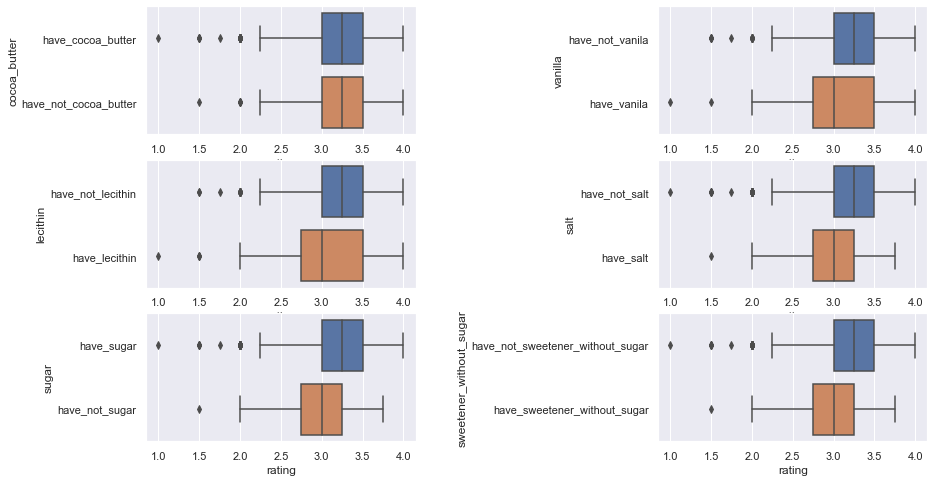

In [13]:
f, ax = plt.subplots(3,2)
f.subplots_adjust(wspace = 0.9)
x_ax = df["rating"]

sns.boxplot(data=df, x=x_ax, y=df["cocoa_butter"], ax=ax[0,0])
sns.boxplot(data=df, x=x_ax, y=df["vanilla"], ax=ax[0,1])
sns.boxplot(data=df, x=x_ax, y=df["lecithin"], ax=ax[1,0])
sns.boxplot(data=df, x=x_ax, y=df["salt"], ax=ax[1,1])
sns.boxplot(data=df, x=x_ax, y=df["sugar"], ax=ax[2,0])
sns.boxplot(data=df, x=x_ax, y=df["sweetener_without_sugar"], ax=ax[2,1])

What do we see ? Those differences are not huge, but still there are some:
* cocoa butter - difference is negligible
* <font color=#d97700>lecithin</font> - chocolates without lecitin tends to score higher
* <font color=#007020>sugar</font> - chocolates with sugar tends to do better
* <font color=#d97700>vanilla</font> - chocolates without vanilla tends to do a little better
* <font color=#d97700>salt</font> - chocolates without salt tends to do a little better
* <font color=#d97700>sweetener without sugar</font> - chocolates wich only sugar as sweetener tends to do better


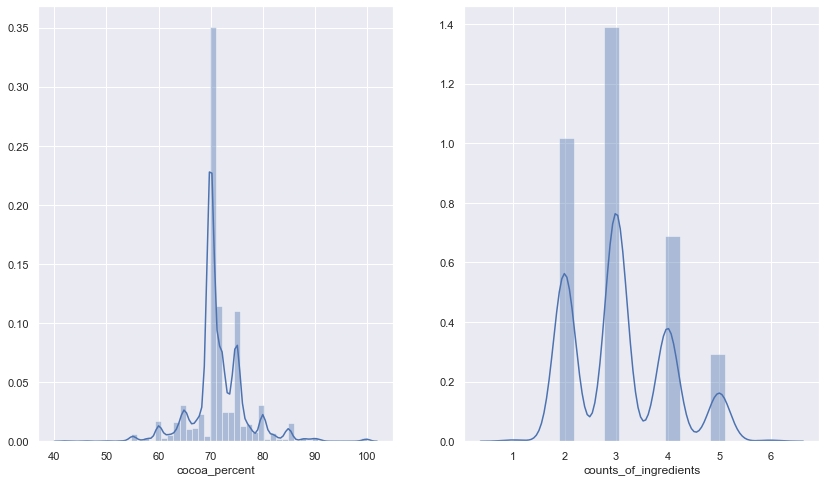

In [14]:
# distribution plots for cocoa % and ingredients count
f, ax = plt.subplots(1,2)
sns.distplot(df["cocoa_percent"], ax=ax[0])
sns.distplot(df["counts_of_ingredients"], ax=ax[1])

here we see that the absolute favorite is 70%, second is 75% and then there are some lefovers lying around. Mostly 3 ingredients ar chosen

In [15]:
# show the mean rating by the country origin of the cocoa beans, again we will drop low ref countries
country_df = df.groupby(["country_of_bean_origin"]).agg({
    "rating":"mean",
    "ref":"count"
})

country_df = country_df[country_df["ref"]>10]
country_df.sort_values(["rating"], ascending=False)

,rating,ref
country_of_bean_origin,,
Congo,3.318182,11
Cuba,3.291667,12
Guatemala,3.273585,53
Papua new guinea,3.270833,48
Haiti,3.270833,24
Madagascar,3.264331,157
Vietnam,3.253906,64
Brazil,3.250000,74
Nicaragua,3.239130,92


The rating spread is so small, I would not consider it to have big impact (if any to be honest). What is usefull is to know the biggest suppliers, now that we see thah the origin of the beans are not that important, lets plot the biggest suppliers

Text(0.5, 1.0, 'The biggest suppliers of the cocoa beans')

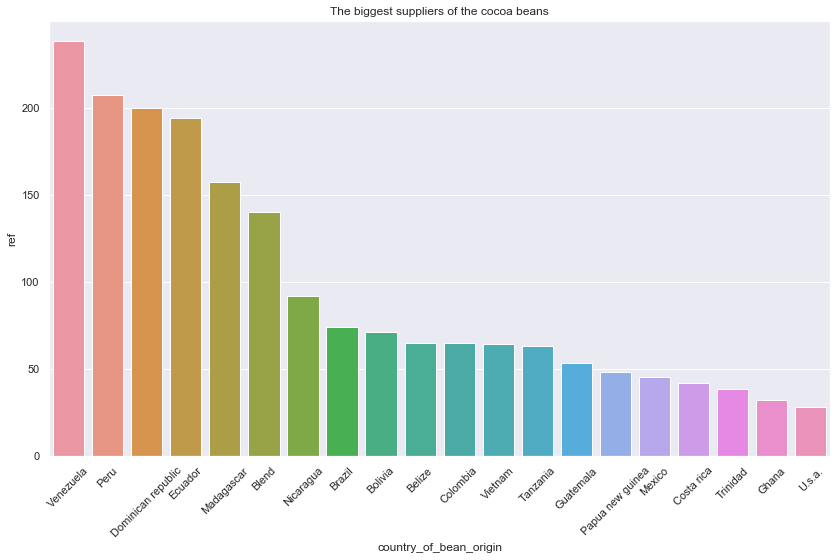

In [16]:
country_df.sort_values(["ref"], ascending=False, inplace=True) # sorting by number of references
country_df = country_df[:20] # leaving only top 20 

g = sns.barplot(data=country_df, x=country_df.index, y="ref")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title("The biggest suppliers of the cocoa beans")

Ok, as the rating does not change much with country of bean origin, the decision would depend on additional information that we could not extract from this database - like shipping costs, reliability of supply etc. So this is good information to pass for decision making but nothing more we could read out more (or at least from my point of view, everybody can miss something here and there).

One more thing could be useful, lets see if there are any companies that are more succesfull than others

In [17]:
companies_df = df.groupby(["company"]).agg({
    "ref":"count",
    "rating":"mean",
    "cocoa_percent":"mean",
    "counts_of_ingredients":"mean",
    "first_taste":"max"
})
companies_df.sort_values(["ref"], ascending=False, inplace=True)

print("\ncompanies sorted by number of references")
companies_df.head(20)


companies sorted by number of references


,ref,rating,cocoa_percent,counts_of_ingredients,first_taste
company,,,,,
Soma,52,3.591346,70.826923,3.000000,uneven
Arete,32,3.531250,70.531250,2.312500,subtle
Fresco,31,3.403226,71.129032,2.870968,woody
Bonnat,28,3.526786,74.642857,3.000000,vegetal
Pralus,26,3.173077,76.153846,3.884615,vegetal
A. Morin,25,3.400000,68.880000,3.960000,vegetal
Domori,22,3.522727,70.136364,2.000000,subtle
Guittard,22,3.170455,66.545455,5.000000,very spicy
Valrhona,22,3.318182,67.181818,4.909091,yogurt


In [18]:
companies_df.sort_values(["rating"], ascending=False, inplace=True)

print("\ncompanies sorted by number of references")
companies_df.head(20)


companies sorted by number of references


,ref,rating,cocoa_percent,counts_of_ingredients,first_taste
company,,,,,
Heirloom Cacao Preservation (Zokoko),2,3.875000,70.000000,3.0,dark berry
Ocelot,2,3.875000,72.500000,3.0,peanut butter
Matale,4,3.812500,71.000000,3.0,sticky
Patric,6,3.791667,69.833333,3.0,smooth
Idilio (Felchlin),10,3.775000,72.000000,3.0,peanut
Utopick,2,3.750000,70.000000,3.0,spice
Obolo,2,3.750000,70.000000,2.0,intense grapes
Kerchner,1,3.750000,70.000000,3.0,fatty
Landmark (Amano),1,3.750000,74.000000,3.0,well balanced


Why making 2 sets ? Because looking into set sorted only by rating might be missleading if there are only a few references. So lets inspect the set sorted by number of references, this should help us to differentiate the outliers created by small number of references. I see a little confirmation here, one of the best rating and with at least 10 references is Idilio and max first taste is peanut (maybe they have 10 different tastes, but I wont inspect so deep to not make this notebook too excessive). It is good to confirm that number of ingredients are in both cases between 2-3, cocoa % might be a little missleading here, maybe the max counted value would be better here, but again, you can rewrite this notebook and make much more deeper analysis of your own.

## <font color=#693000><center>My outcome</center></font>

### <font color=#693000>first - introduction into chocolate market</font>
Before we can give our suggestions about the chocolates, its much better to first show where our ideas come from and why. As the main points to understand, I would show them these:
* who is their main competition
* distribution of flavors nad cocoa %
* main cocoa beans distributors
* impact of specific ingredients on rating

This is more than enough, to not make our presentation too long or boring, lets dive into it (you can save plots or graphs while you create them, I will show some bad practice and mostly copy the code above for specific points)

#### <font color=#693000>main competition</font>

There are some mainstream companies, but as you want to create few high quality chocolates, I will extract companies with similar criteria: few references and high rating

In [19]:
competition_df = df.groupby(["company"]).agg({
    "ref":"count",
    "rating":"mean",
})
competition_df = competition_df[competition_df["ref"]<7]
competition_df = competition_df[competition_df["ref"]>2]
competition_df.sort_values(["rating"], ascending=False, inplace=True)

print("\ncompanies with few chocolates and high ratings")
competition_df.head(10)


companies with few chocolates and high ratings


,ref,rating
company,,
Matale,4,3.812500
Patric,6,3.791667
Benoit Nihant,6,3.708333
Madecasse (Cinagra),4,3.687500
Fresh Coast aka Just Good Choc.,3,3.666667
Raphio,5,3.600000
Durci,6,3.583333
Acalli,4,3.562500
Zokoko,5,3.550000


#### <font color=#693000>distribution of flavors and cocoa %</font>

These are the most used flavors - as first flavor ! There are up to 4 flavors in 1 chocolate, but the first one is of the highest impact

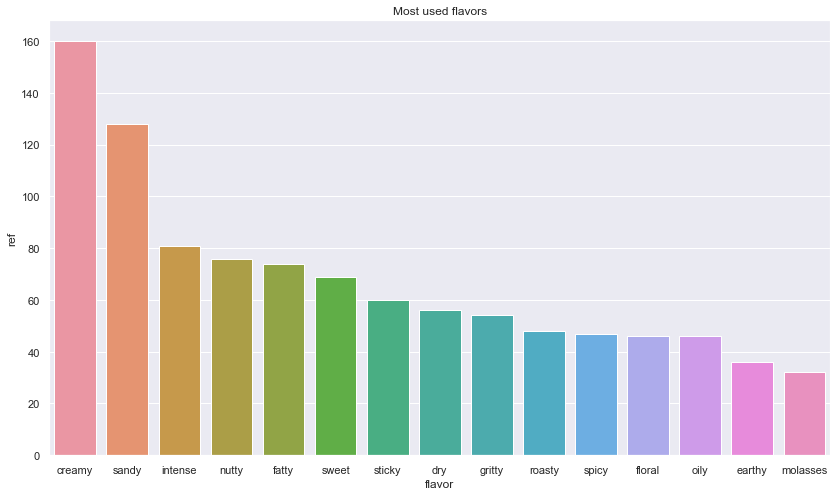

In [20]:
flavors_df = df.groupby(["first_taste"]).agg({"ref":"count", "rating":"mean"})
flavors_df = flavors_df.sort_values(["ref"], ascending=False)[:15]
flavors_df["flavor"] = flavors_df.index

flavors_df.head(30)
plt.title("Most used flavors")
sns.barplot(data=flavors_df, x="flavor", y="ref")

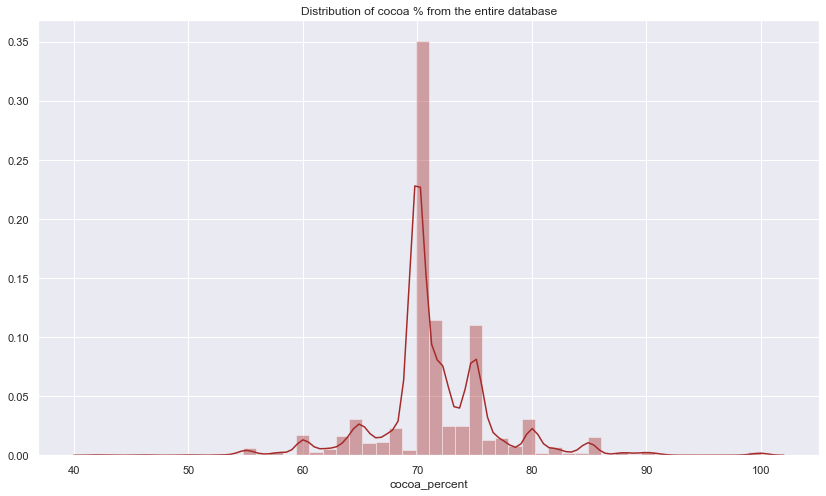

In [21]:
plt.title("Distribution of cocoa % from the entire database")
sns.distplot(df["cocoa_percent"], color="brown")

These 2 plots nicely show the actual trends for cocoa % and flavors that are used

#### <font color=#693000>main cocoa beans distributors</font>

Text(0.5, 1.0, 'The biggest suppliers of the cocoa beans')

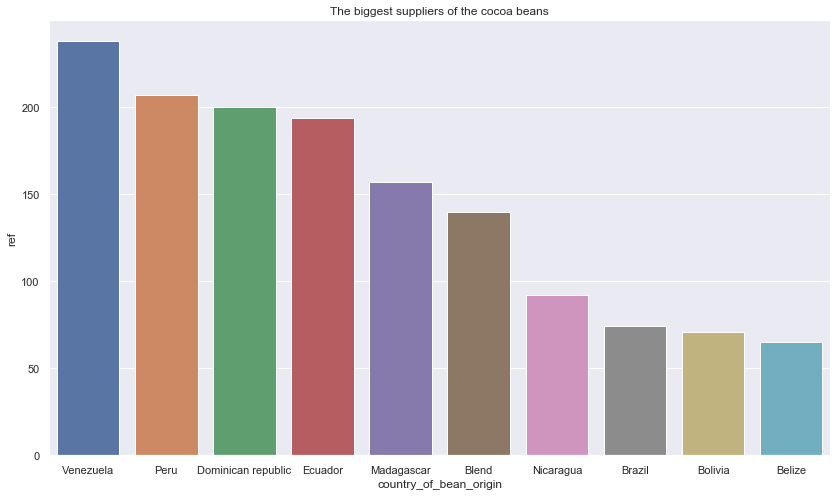

In [22]:
country_df = country_df[:10]

sns.barplot(data=country_df, x=country_df.index, y="ref")
plt.title("The biggest suppliers of the cocoa beans")

This plot is more useful for further decision making where to get our beans from, mostly for distribution costs and so on.

#### <font color=#693000>impact of specific ingredients on rating</font>

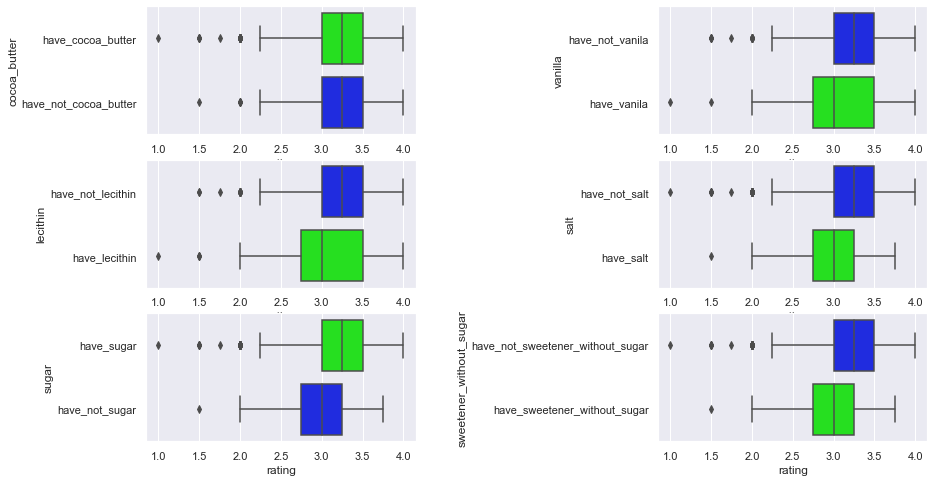

In [23]:
f, ax = plt.subplots(3,2)
f.subplots_adjust(wspace = 0.9)
x_ax = df["rating"]

sns.boxplot(data=df, x=x_ax, y=df["cocoa_butter"], ax=ax[0,0], palette="hsv")
sns.boxplot(data=df, x=x_ax, y=df["vanilla"], ax=ax[0,1], palette="hsv_r")
sns.boxplot(data=df, x=x_ax, y=df["lecithin"], ax=ax[1,0], palette="hsv_r")
sns.boxplot(data=df, x=x_ax, y=df["salt"], ax=ax[1,1], palette="hsv_r")
sns.boxplot(data=df, x=x_ax, y=df["sugar"], ax=ax[2,0], palette="hsv")
sns.boxplot(data=df, x=x_ax, y=df["sweetener_without_sugar"], ax=ax[2,1], palette="hsv_r")

The chosen colors should help in orientation:
* green means it does have the ingredient
* more right inclined, the bigger the score

So, if there are no other reason to choose by, our suggestion is this:
* add: sugar as the only sweetener, cocoa butter if needed
* To be honest, these are hardly big differences to make decisions upon, but as we do not know the procedure and ingredients needed to create the chocolates and work strictly from our dataset, this is our best guess

## <font color=#693000><center>Our suggestion for 3 chocolates</center></font>

#### <font color=#693000>dark berry 70%</font>
70% is without a doubt the most used % for quality chocolates and cherries, dark berries and these kind of commodities has some kind of luxury accent around them, and our data confirmed it. 70% is the lowest of the 3, mainly because we want the flavor to be strong - higher the %, more bitterness is there to cover the intense flavor

#### <font color=#693000>intense 78%</font>
Chocolates above 80% are something else, so I want to stick under this. The main concept behind this one is deep, hardly to identify flavor, mixed somewhere between slightly spicy, sticky and pure cocoa flavor. There are many hints in the data that shows high rating of chocalates with complex flavors, it seems that customers like these "secret", deep and new types

#### <font color=#693000>smooth nuts 72%</font>
We have 2 kinda flavor heavy types, so we want to diversify with something our customers would enjoy leisurely. When they buy it know exactly what they want. So we want to give them the flavor somewhere between smoothly crushed nuts, nougat or peanut butter. Something close to a milky chocolate, but still with some rich tone and no trace of sugar defilement

## <font color=#693000><center>Final word</center></font>
I have to admit I kinda enjoyed inspecting this dataset. As you could see, there are many places where we could dig much deeper and this is one of the small datasets. Best thing you can do is get some datasets and try these kind of tasks on your own ! Thank you for your time reading through this